<a href="https://colab.research.google.com/github/VS-Lucas/Clustering/blob/main/K-means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from matplotlib.colors import ListedColormap

In [214]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Wholesale customers data.csv')
df = dataset.values

In [215]:
scaler = MinMaxScaler()
norm = scaler.fit_transform(df)
dataset = pd.DataFrame(norm)

Escolher o range de colunas

In [273]:
leftSlice, rightSlice = map(int, input().split())

3 5


Elbow method para achar o k ótimo

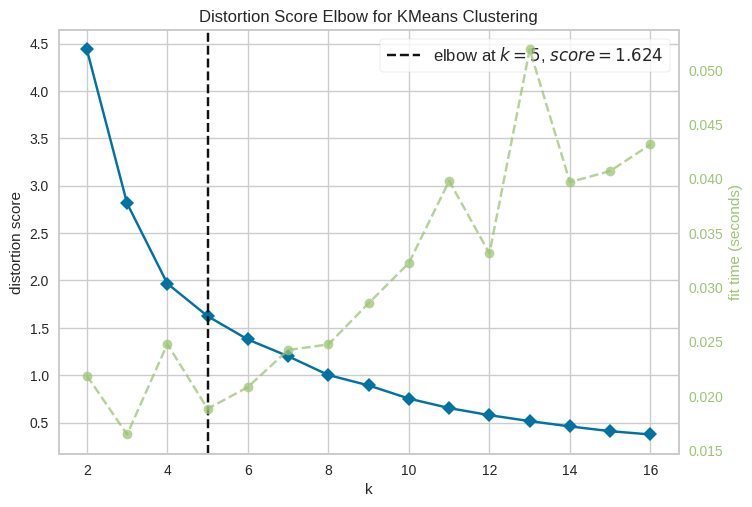

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [274]:
features = dataset.iloc[:, leftSlice:rightSlice]

model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(2,17))

visualizer.fit(features)    
visualizer.poof()   

Testando diferentes números de clusters e encontrando o k ótimo a partir do silhouette coefficient

K=2 Silhouette : 0.7056659517901923
Silhouette: 0.5921099088504572
Silhouette: 0.557858052670947
Silhouette: 0.5491801643534379
Silhouette: 0.522939798855563


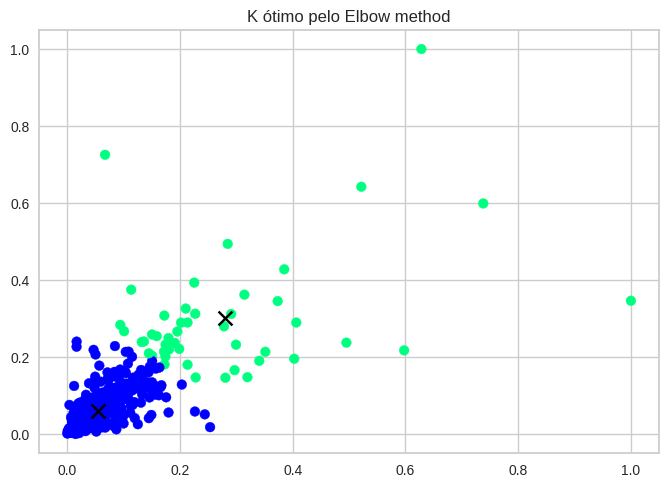

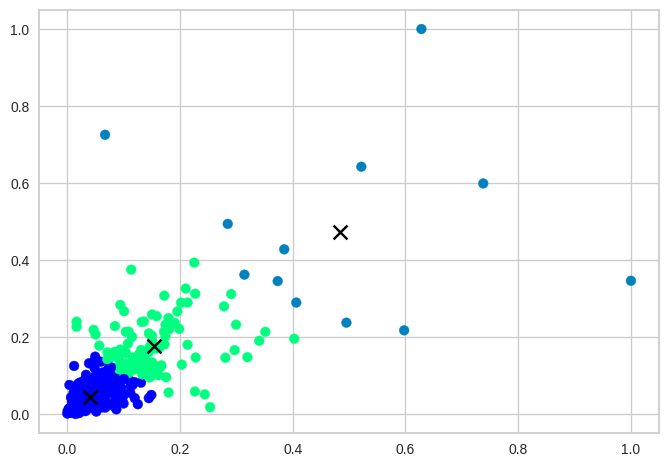

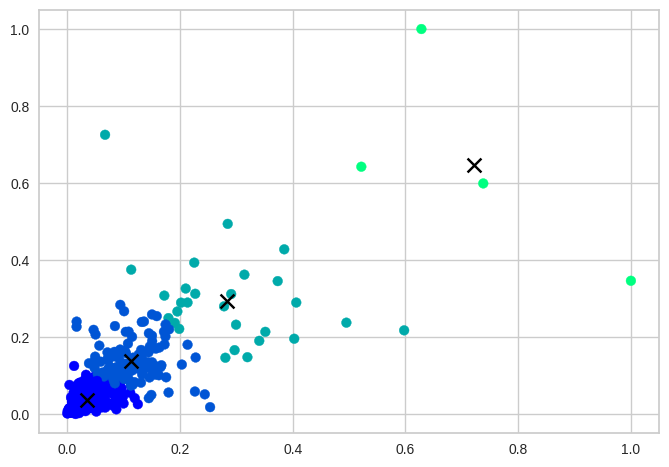

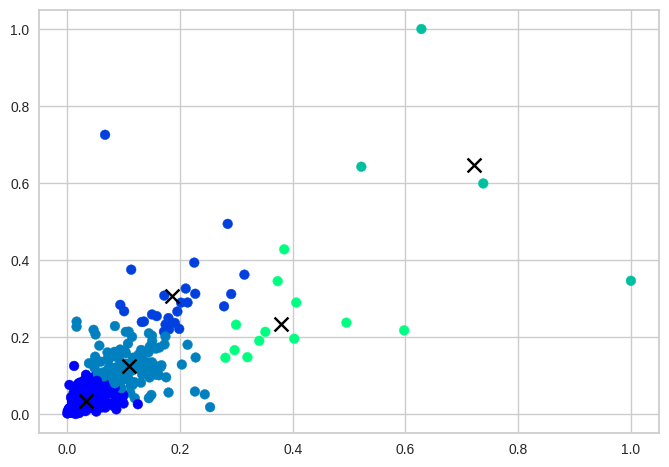

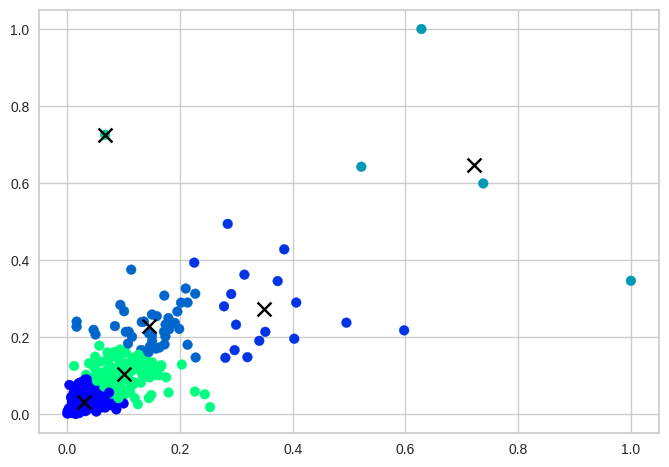

In [286]:
for i in range(2, 7):

  kmeans = KMeans(n_clusters=i, n_init=10)
  kmeans.fit(features)
  cluster_labels = kmeans.predict(features)

  silhouette_avg = metrics.silhouette_score(features, cluster_labels)
  centers = kmeans.cluster_centers_

  if i == 2:
    print(f'K={i} Silhouette : {silhouette_avg}')
  else:
    print(f'Silhouette: {silhouette_avg}')

  fig, ax = plt.subplots()

  ax.scatter(features[3], features[4], c=kmeans.labels_, cmap="winter")
  ax.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', s=100)


  if i == 2:
    ax.set_title('K ótimo pelo Elbow method')